# Guided Project: Building A Handwritten Digits Classifier

In this Guided Project, we'll:

   - explore why image classification is a hard task
   - observe the limitations of traditional machine learning models for image classification
   - train, test, and improve a few different deep neural networks for image classification

In [1]:
# Import Libraries
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

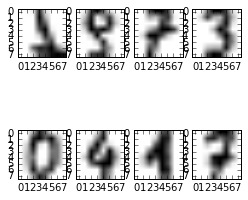

In [2]:
def display_image(pos, ax):
    image = data.iloc[pos]
    np_image = image.values
    np_image = np_image.reshape(8, 8)
    ax.imshow(np_image, cmap='gray_r')
    
def display_row(r_list, r_pos, fig):
    counter = 0        
    for v in r_list:
        ax = fig.add_subplot(r_pos, len(r_list), counter+1)
        display_image(v, ax)
        counter += 1

first_row = [0, 100, 200, 300]
second_row = [1000, 1100, 1200, 1300]

digits = load_digits()
data = pd.DataFrame(digits['data'])
labels = pd.Series(digits['target'])
fig = plt.figure(figsize=(4, 8))

display_row(first_row, 1, fig)
display_row(second_row, 2, fig)

While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption. This allows them to capture nonlinearity in the data. If you recall, k-nearest neighbors don't have a specific model representation (hence why it's referred to as an algorithm and not a model).

The k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some implementations constrain the search space) training observations to look for similar (or the "nearest") observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation.

Recall that you can use the KNeighborsClassifier package to train and test k-nearest neighbors models.

In [3]:
# Shuffle data and Assign train and test sets
np.random.seed(8)
shuffled_index = np.random.permutation(data.index)
shuffled_data = data.loc[shuffled_index]
mid_length = int(len(shuffled_data)/2)

train = data.iloc[:mid_length]
test = data.iloc[mid_length:len(shuffled_data)]

In [4]:
def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors=nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

knn_one_accuracies = cross_validate(1)
np.mean(knn_one_accuracies)

0.9677233358079684

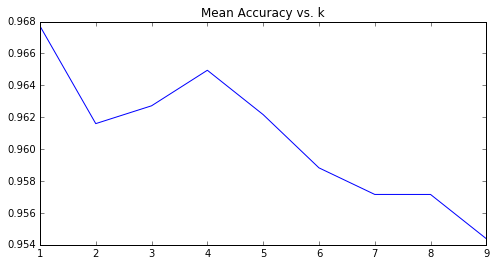

In [5]:
k_values = list(range(1,10))
k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values, k_overall_accuracies)

There are a few downsides to using k-nearest neighbors:

   - high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
   - no model representation to debug and explore

Let's now try a neural network with a single hidden layer. Use the MLPClassifier package from scikit-learn.

In [6]:
def train_nn_logistic(neurons, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neurons)
    mlp.fit(train_features, train_labels)
    return mlp

def cross_validate_nn(neurons):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn_logistic(neurons, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [7]:
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_one_accuracies = []
for n in nn_one_neurons:
    nn_accuracies = cross_validate_nn(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



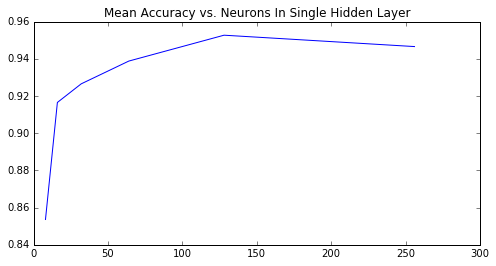

In [8]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)

Adding neurons increases the accuracy. K-nearest has almost the same accuracy and there doesn't seem any advantage using single hideen layer neural network.

Adding more neurons to a single hidden layer vastly improved the classification accuracy.

Let's try using two hidden layers and continue to increase the number of neurons in each layer.

In [9]:
nn_two_neurons = [
    (64,64)
]
nn_two_neurons_accuracies = cross_validate_nn(nn_two_neurons[0])
nn_two_neurons_mean_accuracy = np.mean(nn_two_neurons_accuracies)
print(nn_two_neurons_mean_accuracy)

0.943791140806731


Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



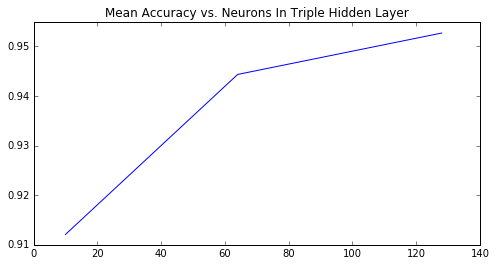

In [10]:
def cross_validate_nn(neurons, k):
    fold_accuracies = []
    kf = KFold(n_splits = k, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn_logistic(neurons, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

nn_three_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

nn_three_accuracies = []
for n in nn_three_neurons:
    nn_accuracies = cross_validate_nn(n, 6)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Triple Hidden Layer")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)

### Summary

Using 3 hidden layers improved our simple accuracy to 96%, even with 6-fold cross validation. This seems to be in line with the research literature out there about deep neural networks for computer vision. Having more layers and more neurons tends to improve the network's performance.